**Author:** João Victor Quintanilha  
**Date:** 2024-11-18

# PART 1: Conceptual

Consider a neural network with 4 input units, two hidden layers each consisting of two neurons, and a single output.

## Question 01. 
How many parameters (weights & biases) need to be estimated for this model?


To calculate the total parameters in a neural network, we account for weights and biases layer by layer:

1. **From Input Layer to First Hidden Layer:**
   - 4 input units connect to 2 neurons in the first hidden layer.
   - **Weights:** 4 x 2 = 8
   - **Biases:** Each neuron has 1 bias, so 2 biases.
   - **Total:** 8 + 2 = 10

2. **From First Hidden Layer to Second Hidden Layer:**
   - 2 neurons in the first hidden layer connect to 2 neurons in the second hidden layer.
   - **Weights:** 2 x 2 = 4
   - **Biases:** Each neuron has 1 bias, so 2 biases.
   - **Total:** 4 + 2 = 6

3. **From Second Hidden Layer to Output Layer:**
   - 2 neurons in the second hidden layer connect to the 1 output neuron.
   - **Weights:** 2 x 1 = 2
   - **Biases:** The output neuron has 1 bias, so 1 bias.
   - **Total:** 2 + 1 = 3

### Total Parameters:
Adding up the parameters from all layers:
$$ 10 + 6 + 3 = 19 $$

**The model requires a total of 19 parameters (weights and biases) to be estimated.**

## Question 02. 
Draw a picture of this network (label each unit and link)

![Diagram of network (produced on mermaid.live](figure1.png)


*Figure 1: Diagram of network (produced on mermaid.live)*

## Question 03. 
Write an expression for the output in terms of the input and model parameters. Assume activation functions to be ReLU.

The output of the neural network can be expressed layer-by-layer using the following notations:

- **Inputs:** $x_1, x_2, x_3, x_4$
- **Weights:** $W_{ij}^{(l)}$, where $l$ is the layer index, $i$ is the neuron in the previous layer, and $j$ is the neuron in the current layer.
- **Biases:** $b_j^{(l)}$, where $l$ is the layer index and $j$ is the neuron index.
- **Activation Function:** ReLU, defined as $\text{ReLU}(z) = \max(0, z)$.

---

#### Layer-by-Layer Expressions:

1. **First Hidden Layer**:  
   The activations for the first hidden layer are:
   $$
   h_1^{(1)} = \text{ReLU}\left(W_{11}^{(1)} x_1 + W_{12}^{(1)} x_2 + W_{13}^{(1)} x_3 + W_{14}^{(1)} x_4 + b_1^{(1)}\right),
   $$
   $$
   h_2^{(1)} = \text{ReLU}\left(W_{21}^{(1)} x_1 + W_{22}^{(1)} x_2 + W_{23}^{(1)} x_3 + W_{24}^{(1)} x_4 + b_2^{(1)}\right).
   $$

2. **Second Hidden Layer**:  
   The activations for the second hidden layer are:
   $$
   h_1^{(2)} = \text{ReLU}\left(W_{11}^{(2)} h_1^{(1)} + W_{12}^{(2)} h_2^{(1)} + b_1^{(2)}\right),
   $$
   $$
   h_2^{(2)} = \text{ReLU}\left(W_{21}^{(2)} h_1^{(1)} + W_{22}^{(2)} h_2^{(1)} + b_2^{(2)}\right).
   $$

3. **Output Layer**:  
   The output of the neural network is:
   $$
   y = \text{ReLU}\left(W_{11}^{(3)} h_1^{(2)} + W_{12}^{(3)} h_2^{(2)} + b^{(3)}\right).
   $$

---

### Final Output (Compact Form):

The final output $y$ can be expressed recursively as:
$$
h_j^{(l)} = \text{ReLU}\left(\sum_i W_{ij}^{(l)} h_i^{(l-1)} + b_j^{(l)}\right),
$$
where $h_i^{(0)} = x_i$ (the input), and the final output is:
$$
y = h_1^{(3)}.
$$

---

### Explanation:

1. **Layer Structure**:  
   - **First Layer**: Maps the inputs $x_i$ through weighted sums and biases, followed by ReLU activation.  
   - **Second Layer**: Takes activations from the first hidden layer as inputs and applies the same weighted sum, bias, and ReLU operation.  
   - **Output Layer**: Combines the second hidden layer’s activations into a single output value with ReLU.

2. **Recursive Representation**:  
   The compact representation describes the neural network's computation across layers without needing to expand all neuron-specific calculations.

3. **Activation and Output**:  
   ReLU ensures non-linearity, and the final output layer uses a weighted sum of the last hidden layer activations.



# PART 02: Coding

You are required to work with the loan.csv dataset, which will be used to predict the status of a loan (loan status) based on various predictor variables included in the dataset. You are free to build your model using Python or R.

Variables:
The response variable is: Y = loan status
The predictor variables we are interested in are all other variables in the dataset.

## Question 01. 
Begin by cleaning the dataset: remove all rows containing null values. Next, convert all categorical features into numeric formats suitable for modeling. Ensure that the dataset is balanced with respect to the response variable loan status to prevent any bias in prediction outcomes. Finally, split the dataset into a training set (70%) and a testing set (30%), and display the shape of each to confirm the split.

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Load the dataset
df = pd.read_csv("loan.csv")

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status 

### 1. Cleaning the dataset: Remove rows with null values


In [2]:
df = df.dropna()
print("\nDataset after dropping null values:")
print(df.info())


Dataset after dropping null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  

### 2. Convert categorical features to numeric formats


In [3]:
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
print("\nDataset after converting categorical features:")
print(df.head())



Dataset after converting categorical features:
   id  person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0   0          37          35000                0.0       6000          11.49   
1   1          22          56000                6.0       4000          13.35   
2   2          29          28800                8.0       6000           8.90   
3   3          30          70000               14.0      12000          11.11   
4   4          22          60000                2.0       6000           6.92   

   loan_percent_income  cb_person_cred_hist_length  loan_status  \
0                 0.17                          14            0   
1                 0.07                           2            0   
2                 0.21                          10            0   
3                 0.17                           5            0   
4                 0.10                           3            0   

   person_home_ownership_OTHER  ...  loan_intent_MEDICAL  \
0 

### 3. Balance the dataset with respect to the response variable

In [4]:
# Separate majority and minority classes
df_majority = df[df['loan_status'] == 0]
df_minority = df[df['loan_status'] == 1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,  # sample with replacement
                                 n_samples=len(df_majority),  # to match majority class size
                                 random_state=42)  # reproducible results

# Combine majority class with upsampled minority class
df_balanced = pd.concat([df_majority, df_minority_upsampled])

# Shuffle the dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nDataset after balancing:")
print(df_balanced['loan_status'].value_counts())


Dataset after balancing:
0    50295
1    50295
Name: loan_status, dtype: int64


### 4. Split the dataset into training and testing sets

In [5]:
X = df_balanced.drop('loan_status', axis=1)  # Predictor variables
y = df_balanced['loan_status']  # Response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the splits
print("\nShape of Training and Testing Sets:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")



Shape of Training and Testing Sets:
X_train: (70413, 23), X_test: (30177, 23)
y_train: (70413,), y_test: (30177,)


## Question 02.
Construct a neural network model with at least one hidden layer to predict loan status. Compile and train your model using the training dataset. After training, use the model to predict loan status on the test dataset. Evaluate your model’s performance by calculating its accuracy and generating a confusion matrix. If the initial model accuracy is below 85%, adjust and tune your model to achieve at least 85% accuracy.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),            # Hidden layer 1
    Dropout(0.3),                            # Dropout to prevent overfitting
    Dense(32, activation='relu'),            # Hidden layer 2
    Dropout(0.3),                            # Dropout to prevent overfitting
    Dense(1, activation='sigmoid')           # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(
    monitor='val_accuracy',  # Monitor validation accuracy
    patience=10,             # Allow up to 10 epochs of no improvement
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,                # Allow more epochs for fine-tuning
    batch_size=64,             # Batch size
    validation_split=0.2,      # 20% of training data for validation
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 711us/step - accuracy: 0.6155 - loss: 0.6427 - val_accuracy: 0.8221 - val_loss: 0.4221
Epoch 2/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.8011 - loss: 0.4471 - val_accuracy: 0.8383 - val_loss: 0.3812
Epoch 3/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - accuracy: 0.8198 - loss: 0.4136 - val_accuracy: 0.8421 - val_loss: 0.3669
Epoch 4/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 750us/step - accuracy: 0.8290 - loss: 0.3991 - val_accuracy: 0.8451 - val_loss: 0.3590
Epoch 5/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 738us/step - accuracy: 0.8323 - loss: 0.3948 - val_accuracy: 0.8458 - val_loss: 0.3534
Epoch 6/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.8338 - loss: 0.3870 - val_accuracy: 0.8485 - val_loss: 0.3492
Epoch 7/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.8390 - loss: 0.3806 - val_accuracy: 0.8509 - val_loss: 0.3454
Epoch 8/100
881/881 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.8383 - loss: 0

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the test set
y_pred = model.predict(X_test_scaled)  # Outputs probabilities
y_pred_binary = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values (0 or 1)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


944/944 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step
Test Accuracy: 86.02%


In [8]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[13908  1139]
 [ 3079 12051]]


In [9]:
# Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87     15047
           1       0.91      0.80      0.85     15130

    accuracy                           0.86     30177
   macro avg       0.87      0.86      0.86     30177
weighted avg       0.87      0.86      0.86     30177


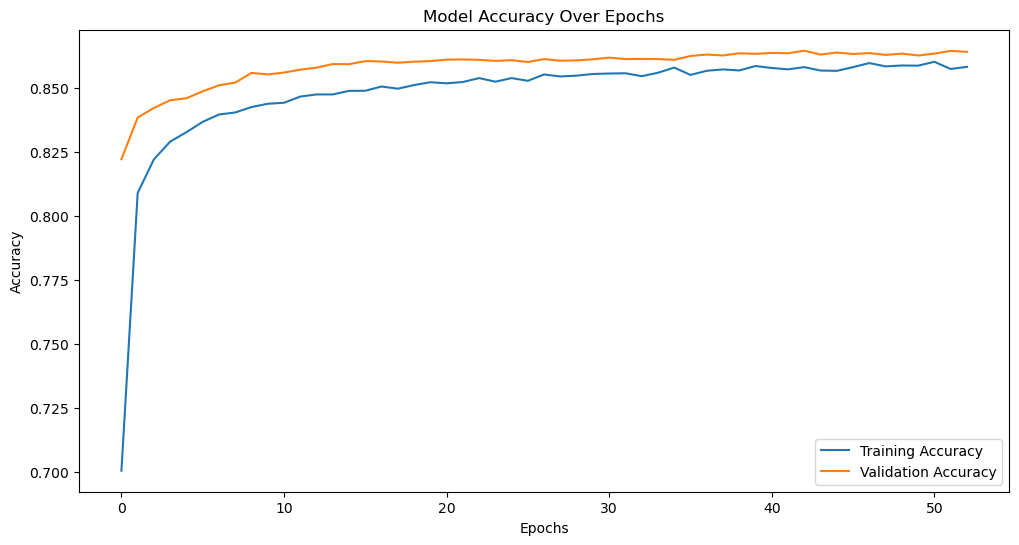

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Conclusion
The neural network model achieved a test accuracy of 86.02%, surpassing the target of 85%. This indicates that the model is well-suited for predicting loan status based on the provided features.

The training and validation accuracy trends show consistent improvement over the epochs, with minimal overfitting, as evidenced by the close alignment between training and validation curves. Similarly, the loss curves demonstrate steady decreases in both training and validation loss, further confirming that the model generalizes well to unseen data.

From the confusion matrix and classification report, we observe:

- **Class 0 (loan not approved):** High recall (93%) ensures most true negatives are correctly identified, though precision is slightly lower (82%), suggesting some false positives.
- **Class 1 (loan approved):** The model demonstrates strong precision (92%), meaning most predicted positives are correct, though recall (80%) suggests room for improvement in identifying all true positives.